“""Name: Adwoa Nhyira Attafuah-Wadee
Library: SQLAlchemy
URL: https://docs.sqlalchemy.org/en/20/
Description:
This library is a comprehensive set of tools for working with databases and Python. It is the Python SQL toolkit and Object Relational Mapper that gives application developers and data analysts/scientists the full power and flexibility of SQL. It provides efficient and high-performing database access, adapted into a simple and Pythonic domain language."""

## Tutorial POV

A data scientist creating an analytics dashboard for an e-commerce website.

### INSTALLATION

In [ ]:
pip install sqlalchemy

In [66]:
import matplotlib.pyplot as plt
import random
import sqlalchemy
from sqlalchemy import create_engine, inspect, func, join, select, text, update, Column, Integer, String, Float, ForeignKey, MetaData, Table
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import relationship, sessionmaker


### CHECK VERSION

In [ ]:
sqlalchemy.__version__  

### UPGRADE VERSION

In [ ]:
pip install --upgrade sqlalchemy

### CONNECT TO DATABASE

##### SQLAlchemy begins with an object called the Engine. It is a central source of connections to a particular database, providing both a factory as well as a holding space called a connection pool for these database connections.

In [2]:
engine = create_engine("sqlite+pysqlite:///ecommercee.db", echo=True)

### CRUD (Create, Retrieve, Update, Delete)

####  CREATE CLASSES (DATA TABLES)

Create Product, Order and Customer classes and their attributes. These classes represent the tables that will be in the ecommerce database. 

In [3]:
#This declarative_base() function acts as framework or structure by which the classes created follow
Base = declarative_base()

# Many-to-many association table for Order and Product
order_product_table = Table('order_product', Base.metadata,
    Column('order_id', Integer, ForeignKey('orders.id'), primary_key=True),
    Column('product_id', Integer, ForeignKey('products.id'), primary_key=True)
)

C:\Users\Nhyira\AppData\Local\Temp\ipykernel_35176\2564174533.py:2: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


In [4]:
class Product(Base):
    __tablename__ = 'products'
    
    id = Column(Integer, primary_key=True)
    name = Column(String(100), nullable=False)
    price = Column(Float, nullable=False)
    category = Column(String(50), nullable=False)
    
    # Relationship for many-to-many with Order
    orders = relationship("Order", secondary=order_product_table, back_populates="products")


In [5]:
class Order(Base):
    __tablename__ = 'orders'
    
    id = Column(Integer, primary_key=True)
    customer_id = Column(Integer, ForeignKey('customers.id'))
    # Relationship for many-to-many with Product
    products = relationship("Product", secondary=order_product_table, back_populates="orders")
    # Relationship to Customer...one-to-many
    customer = relationship("Customer", back_populates="orders")


In [6]:
class Customer(Base):
    __tablename__ = 'customers'
    
    id = Column(Integer, primary_key=True)
    name = Column(String(100), nullable=False)
    email = Column(String(100), nullable=False, unique=True)
    # Relationship with Order...one-to-many
    orders = relationship("Order", back_populates="customer")

In [7]:
# Create all the defined tables in the database specified by the engine...ecommerce.db
#In other words, it generates SQL commands for table creation based on your model definitions stored in the metadata object
Base.metadata.create_all(engine)

2024-03-20 22:51:45,130 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-03-20 22:51:45,134 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("order_product")
2024-03-20 22:51:45,135 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-03-20 22:51:45,148 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("order_product")
2024-03-20 22:51:45,149 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-03-20 22:51:45,151 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("products")
2024-03-20 22:51:45,152 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-03-20 22:51:45,153 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("products")
2024-03-20 22:51:45,154 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-03-20 22:51:45,156 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("orders")
2024-03-20 22:51:45,157 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-03-20 22:51:45,158 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("orders")
2024-03-20 22:51:45,159 INFO sqlalchemy.engine.Engine 

In [8]:
# Create a sessionmaker bound to the engine. This will enable us to commit changes to the database.
Session = sessionmaker(bind=engine)

# Create a session using the sessionmaker
session = Session()

In [9]:
# Create product
product1 = Product(name='Crop Hoodie', price=69.99, category='Athleisure')
product2 = Product(name='Wide-leg Slacks', price=49.99, category='Athleisure')

# Add products to the session
session.add_all([product1, product2])

# Commit the changes to the database
session.commit()

2024-03-20 22:52:00,278 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-03-20 22:52:00,281 INFO sqlalchemy.engine.Engine INSERT INTO products (name, price, category) VALUES (?, ?, ?) RETURNING id
2024-03-20 22:52:00,282 INFO sqlalchemy.engine.Engine [generated in 0.00015s (insertmanyvalues) 1/2 (ordered; batch not supported)] ('Crop Hoodie', 69.99, 'Athleisure')
2024-03-20 22:52:00,285 INFO sqlalchemy.engine.Engine INSERT INTO products (name, price, category) VALUES (?, ?, ?) RETURNING id
2024-03-20 22:52:00,286 INFO sqlalchemy.engine.Engine [insertmanyvalues 2/2 (ordered; batch not supported)] ('Wide-leg Slacks', 49.99, 'Athleisure')
2024-03-20 22:52:00,288 INFO sqlalchemy.engine.Engine COMMIT


In [10]:
# Create instances of customers
cust1 = Customer(name='Nhyira Wadee', email='nwadee@gmail.com')
cust2 = Customer(name='Ben Smith', email='bssmith@yahoo.com')

# Add customers to the session
session.add_all([cust1, cust2])

# Commit the changes to the database
session.commit()

2024-03-20 22:52:06,543 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-03-20 22:52:06,548 INFO sqlalchemy.engine.Engine INSERT INTO customers (name, email) VALUES (?, ?) RETURNING id
2024-03-20 22:52:06,549 INFO sqlalchemy.engine.Engine [generated in 0.00037s (insertmanyvalues) 1/2 (ordered; batch not supported)] ('Nhyira Wadee', 'nwadee@gmail.com')
2024-03-20 22:52:06,555 INFO sqlalchemy.engine.Engine INSERT INTO customers (name, email) VALUES (?, ?) RETURNING id
2024-03-20 22:52:06,557 INFO sqlalchemy.engine.Engine [insertmanyvalues 2/2 (ordered; batch not supported)] ('Ben Smith', 'bssmith@yahoo.com')
2024-03-20 22:52:06,563 INFO sqlalchemy.engine.Engine COMMIT


In [11]:
# Create instances of orders and associate them with customers and products
order1 = Order(customer=cust2)
order1.products.append(product2)

order2 = Order(customer=cust1, products=[product2, product1])

# Add orders to the session
session.add_all([order1, order2])

# Commit the changes to the database
session.commit()

2024-03-20 22:52:14,636 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-03-20 22:52:14,641 INFO sqlalchemy.engine.Engine SELECT customers.id AS customers_id, customers.name AS customers_name, customers.email AS customers_email 
FROM customers 
WHERE customers.id = ?
2024-03-20 22:52:14,644 INFO sqlalchemy.engine.Engine [generated in 0.00174s] (1,)
2024-03-20 22:52:14,646 INFO sqlalchemy.engine.Engine SELECT customers.id AS customers_id, customers.name AS customers_name, customers.email AS customers_email 
FROM customers 
WHERE customers.id = ?
2024-03-20 22:52:14,647 INFO sqlalchemy.engine.Engine [cached since 0.005286s ago] (2,)
2024-03-20 22:52:14,650 INFO sqlalchemy.engine.Engine INSERT INTO orders (customer_id) VALUES (?) RETURNING id
2024-03-20 22:52:14,650 INFO sqlalchemy.engine.Engine [generated in 0.00016s (insertmanyvalues) 1/2 (ordered; batch not supported)] (2,)
2024-03-20 22:52:14,653 INFO sqlalchemy.engine.Engine INSERT INTO orders (customer_id) VALUES (?) RETURNING id

##### Retrieve

In [12]:
# Retrieve and print all products
print("Products:")
for product in session.query(Product).all():
    print(f"ID: {product.id}, Name: {product.name}, Price: {product.price}, Category: {product.category}")


Products:
2024-03-20 22:52:21,301 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-03-20 22:52:21,303 INFO sqlalchemy.engine.Engine SELECT products.id AS products_id, products.name AS products_name, products.price AS products_price, products.category AS products_category 
FROM products
2024-03-20 22:52:21,305 INFO sqlalchemy.engine.Engine [generated in 0.00183s] ()
ID: 1, Name: Crop Hoodie, Price: 69.99, Category: Athleisure
ID: 2, Name: Wide-leg Slacks, Price: 49.99, Category: Athleisure


In [13]:
# Retrieve and print all customers
print("Customers:")
for customer in session.query(Customer).all():
    print(f"ID: {customer.id}, Name: {customer.name}, Email: {customer.email}")

Customers:
2024-03-20 22:52:25,606 INFO sqlalchemy.engine.Engine SELECT customers.id AS customers_id, customers.name AS customers_name, customers.email AS customers_email 
FROM customers
2024-03-20 22:52:25,609 INFO sqlalchemy.engine.Engine [generated in 0.00370s] ()
ID: 1, Name: Nhyira Wadee, Email: nwadee@gmail.com
ID: 2, Name: Ben Smith, Email: bssmith@yahoo.com


In [14]:
# Retrieve and print all orders
print("Orders:")
for order in session.query(Order).all():
    print(f"ID: {order.id}, Customer: {order.customer_id}")

Orders:
2024-03-20 22:52:35,002 INFO sqlalchemy.engine.Engine SELECT orders.id AS orders_id, orders.customer_id AS orders_customer_id 
FROM orders
2024-03-20 22:52:35,005 INFO sqlalchemy.engine.Engine [generated in 0.00376s] ()
ID: 1, Customer: 2
ID: 2, Customer: 1


In [15]:
# Retrieve and print all product-order associations
# Cannot query it the same way as the others tables since they are ORM classes and this table was created using the Table construct
print("Product-Order Associations:")
for association in session.query(order_product).all():
    print(association)

Product-Order Associations:


NameError: name 'order_product' is not defined

In [46]:
# Retrieve and print all product-order associations
# Define a raw SQL query to select all rows from the association table
sql_query = text("SELECT * FROM order_product")

# Execute the raw SQL query
with engine.connect() as conn:
    result = conn.execute(sql_query)

# Print the results
print("Product-Order Associations:")
for row in result:
    print(row)

2024-03-20 23:06:41,095 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-03-20 23:06:41,097 INFO sqlalchemy.engine.Engine SELECT * FROM order_product
2024-03-20 23:06:41,100 INFO sqlalchemy.engine.Engine [cached since 839.7s ago] ()
2024-03-20 23:06:41,103 INFO sqlalchemy.engine.Engine ROLLBACK
Product-Order Associations:
(2, 2)
(2, 1)
(1, 2)
(15, 9)
(15, 20)
(25, 4)
(25, 18)
(16, 26)
(16, 21)
(16, 23)
(26, 6)
(26, 4)
(26, 20)
(26, 7)
(6, 6)
(6, 12)
(6, 20)
(6, 27)
(6, 5)
(17, 13)
(17, 18)
(17, 6)
(17, 12)
(27, 21)
(27, 24)
(27, 20)
(27, 13)
(7, 3)
(7, 2)
(7, 25)
(7, 23)
(18, 2)
(18, 26)
(18, 6)
(18, 7)
(28, 15)
(28, 19)
(28, 11)
(28, 2)
(28, 23)
(8, 4)
(8, 23)
(19, 24)
(29, 17)
(9, 20)
(9, 27)
(3, 26)
(3, 7)
(30, 2)
(20, 9)
(20, 14)
(20, 21)
(20, 6)
(20, 11)
(10, 14)
(31, 23)
(31, 9)
(31, 1)
(31, 20)
(11, 15)
(11, 19)
(11, 4)
(21, 18)
(21, 13)
(21, 1)
(4, 20)
(4, 1)
(4, 21)
(4, 13)
(32, 7)
(32, 3)
(32, 22)
(32, 27)
(32, 2)
(12, 7)
(22, 22)
(22, 15)
(22, 11)
(13, 10)
(5, 12)
(5, 6)


Creating a test table in the e-commerce database using Core dependencies

In [17]:
with engine.connect() as conn:
    conn.execute(text("CREATE TABLE Core_test (x int, y int)"))
    conn.execute(
        text("INSERT INTO Core_test (x, y) VALUES (:x, :y)"),
        [{"x": 1, "y": 1}, {"x": 2, "y": 4}],
    )
    conn.commit()


2024-03-20 22:52:55,889 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-03-20 22:52:55,890 INFO sqlalchemy.engine.Engine CREATE TABLE Core_test (x int, y int)
2024-03-20 22:52:55,891 INFO sqlalchemy.engine.Engine [generated in 0.00278s] ()
2024-03-20 22:52:55,907 INFO sqlalchemy.engine.Engine INSERT INTO Core_test (x, y) VALUES (?, ?)
2024-03-20 22:52:55,908 INFO sqlalchemy.engine.Engine [generated in 0.00160s] [(1, 1), (2, 4)]
2024-03-20 22:52:55,911 INFO sqlalchemy.engine.Engine COMMIT


In [18]:
# Define a select statement for the test table
query = text("SELECT * FROM Core_test")

# Execute the select statement and retrieve the results
with engine.connect() as conn:
    result = conn.execute(query)

# Print the results
print("Test Table:")
for row in result:
    print(f"x: {row.x}  y: {row.y}")

2024-03-20 22:53:01,765 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-03-20 22:53:01,767 INFO sqlalchemy.engine.Engine SELECT * FROM Core_test
2024-03-20 22:53:01,768 INFO sqlalchemy.engine.Engine [generated in 0.00243s] ()
2024-03-20 22:53:01,769 INFO sqlalchemy.engine.Engine ROLLBACK
Test Table:
x: 1  y: 1
x: 2  y: 4


##### Update

In [19]:
# Retrieve the customer by their ID
customer = session.query(Customer).filter_by(id=1).first()

# Update the email attribute
if customer:
    customer.email = "nwadee1@gmail.com"
    session.commit()
    print("Email updated successfully.")
else:
    print("Customer not found.")

2024-03-20 22:53:04,739 INFO sqlalchemy.engine.Engine SELECT customers.id AS customers_id, customers.name AS customers_name, customers.email AS customers_email 
FROM customers 
WHERE customers.id = ?
 LIMIT ? OFFSET ?
2024-03-20 22:53:04,741 INFO sqlalchemy.engine.Engine [generated in 0.00265s] (1, 1, 0)
2024-03-20 22:53:04,752 INFO sqlalchemy.engine.Engine UPDATE customers SET email=? WHERE customers.id = ?
2024-03-20 22:53:04,754 INFO sqlalchemy.engine.Engine [generated in 0.00256s] ('nwadee1@gmail.com', 1)
2024-03-20 22:53:04,761 INFO sqlalchemy.engine.Engine COMMIT
Email updated successfully.


In [20]:
# Define a update statement for the test table
update_query = text(
    "UPDATE Core_test "
    "SET y = :y "
    "WHERE x = :x"
)

# Execute the update statement 
with engine.connect() as conn:
    conn.execute(
        update_query, 
        {"y": 10, "x": 2}
    )
    conn.commit()

2024-03-20 22:53:11,332 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-03-20 22:53:11,335 INFO sqlalchemy.engine.Engine UPDATE Core_test SET y = ? WHERE x = ?
2024-03-20 22:53:11,336 INFO sqlalchemy.engine.Engine [generated in 0.00510s] (10, 2)
2024-03-20 22:53:11,341 INFO sqlalchemy.engine.Engine COMMIT


In [22]:
# Define the update statement
update_statement = update(Core_test).where(Core_test.c.x == 2).values(y=12)

# Execute the update statement
with engine.connect() as conn:
    result = conn.execute(update_statement)
    conn.commit()
    
# The code snippet doesn't work because the table was created using raw SQL commands, bypassing SQLAlchemy's ORM or Core declarative system. 
# Interaction with the database is at a low level, 
# thus, SQLAlchemy doesn't automatically manage or recognize these tables as part of its ORM or Core declarative system.
# So the tables created using raw SQL aren't automatically integrated into SQLAlchemy's ORM or Core. 
# This prevents the use of higher-level constructs like ORM models or Core queries such as update() directly on these tables. 

# This is resolved by reflecting the table structure explicitly using SQLAlchemy's reflection capabilities 
# or defining the tables using SQLAlchemy's ORM or Core constructs.

NameError: name 'Core_test' is not defined

In [23]:
# Reflecting the table structure explicitly using SQLAlchemy's reflection capabilities

metadata = MetaData()
Core_test = Table('Core_test', metadata, autoload_with=engine)


2024-03-20 22:53:34,859 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-03-20 22:53:34,862 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("Core_test")
2024-03-20 22:53:34,864 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-03-20 22:53:34,867 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')
2024-03-20 22:53:34,869 INFO sqlalchemy.engine.Engine [raw sql] ('Core_test',)
2024-03-20 22:53:34,873 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("Core_test")
2024-03-20 22:53:34,874 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-03-20 22:53:34,877 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("Core_test")
2024-03-20 22:53:34,879 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-03-20 22:53:34,882 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('

In [24]:
# Now, update using update construct

update_statement = update(Core_test).where(Core_test.c.x == 2).values(y=12)

# Execute the update statement
with engine.connect() as conn:
    result = conn.execute(update_statement)
    conn.commit()

2024-03-20 22:53:43,941 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-03-20 22:53:43,942 INFO sqlalchemy.engine.Engine UPDATE "Core_test" SET y=? WHERE "Core_test".x = ?
2024-03-20 22:53:43,943 INFO sqlalchemy.engine.Engine [generated in 0.00195s] (12, 2)
2024-03-20 22:53:43,947 INFO sqlalchemy.engine.Engine COMMIT


##### Delete

In [25]:
# Define a delete statement for the test table
delete_query = text("DELETE FROM Core_test WHERE x = :x")

# Execute the delete statement with a parameter
with engine.connect() as conn:
    conn.execute(delete_query, {"x": 2})
    conn.commit()

2024-03-20 22:53:51,213 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-03-20 22:53:51,217 INFO sqlalchemy.engine.Engine DELETE FROM Core_test WHERE x = ?
2024-03-20 22:53:51,220 INFO sqlalchemy.engine.Engine [generated in 0.00723s] (2,)
2024-03-20 22:53:51,233 INFO sqlalchemy.engine.Engine COMMIT


In [51]:
# Adding a column
order_product_table = Table(
    'order_product',
    metadata,
    Column('order_id', Integer, ForeignKey('orders.id'), primary_key=True),
    Column('product_id', Integer, ForeignKey('products.id'), primary_key=True),
    Column('quantity_ordered', Integer, nullable=False, default=1)
)

# Reflect the changes in the database
order_product_table.create(engine, checkfirst=True)

2024-03-20 23:11:24,339 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-03-20 23:11:24,339 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("order_product")
2024-03-20 23:11:24,340 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-03-20 23:11:24,342 INFO sqlalchemy.engine.Engine COMMIT


In [54]:
# Reflect the changes in the database
Base.metadata.create_all(engine)

2024-03-20 23:12:14,383 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-03-20 23:12:14,384 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("order_product")
2024-03-20 23:12:14,387 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-03-20 23:12:14,392 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("products")
2024-03-20 23:12:14,394 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-03-20 23:12:14,397 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("orders")
2024-03-20 23:12:14,399 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-03-20 23:12:14,402 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("customers")
2024-03-20 23:12:14,403 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-03-20 23:12:14,405 INFO sqlalchemy.engine.Engine COMMIT


In [65]:
inspector = inspect(engine)
columns = inspector.get_columns('order_product')

# Print column titles
for column in columns:
    print(column)

2024-03-20 23:28:23,418 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-03-20 23:28:23,419 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("order_product")
2024-03-20 23:28:23,420 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-03-20 23:28:23,422 INFO sqlalchemy.engine.Engine ROLLBACK
{'name': 'order_id', 'type': INTEGER(), 'nullable': False, 'default': None, 'primary_key': 1}
{'name': 'product_id', 'type': INTEGER(), 'nullable': False, 'default': None, 'primary_key': 2}


#### ADVANCED SQL QUERIES

Performing more advanced, and customized analysis using Core dependencies as it provides more control over SQL query formation. 

In [ ]:
# Populate tables

In [26]:
new_products = [
    {"name": "Denim Jacket", "price": 69.99, "category": "Clothing"},
    {"name": "Leather Messenger Bag", "price": 99.99, "category": "Bags"},
    {"name": "Running Shoes", "price": 59.99, "category": "Shoes"},
    {"name": "Sunglasses", "price": 19.99, "category": "Accessories"},
    {"name": "Graphic T-Shirt", "price": 29.99, "category": "Clothing"},
    {"name": "Canvas Backpack", "price": 49.99, "category": "Bags"},
    {"name": "Sandals", "price": 39.99, "category": "Shoes"},
    {"name": "Statement Necklace", "price": 24.99, "category": "Accessories"},
    {"name": "Hoodie Sweatshirt", "price": 49.99, "category": "Clothing"},
    {"name": "Leather Tote Bag", "price": 79.99, "category": "Bags"},
    {"name": "Laptop Sleeve", "price": 19.99, "category": "Accessories"},
    {"name": "Dress Shoes", "price": 79.99, "category": "Shoes"},
    {"name": "Baseball Cap", "price": 14.99, "category": "Accessories"},
    {"name": "Crossbody Purse", "price": 39.99, "category": "Bags"},
    {"name": "Athletic Leggings", "price": 44.99, "category": "Athleisure"},
    {"name": "Travel Duffel Bag", "price": 59.99, "category": "Bags"},
    {"name": "Casual Sneakers", "price": 49.99, "category": "Shoes"},
    {"name": "Scarf", "price": 29.99, "category": "Accessories"},
    {"name": "Button-Up Shirt", "price": 39.99, "category": "Clothing"},
    {"name": "Leather Wallet", "price": 24.99, "category": "Accessories"},
    {"name": "Backpack", "price": 54.99, "category": "Bags"},
    {"name": "Running Jacket", "price": 79.99, "category": "Clothing"},
    {"name": "Ankle Boots", "price": 69.99, "category": "Shoes"},
    {"name": "Trench Coat", "price": 89.99, "category": "Clothing"},
    {"name": "Leather Belt", "price": 34.99, "category": "Accessories"},
]

In [27]:
# Add all products to the session
session.add_all([Product(**product_info) for product_info in new_products])

# Commit the session to save changes to the database
session.commit()

2024-03-20 22:54:02,665 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-03-20 22:54:02,668 INFO sqlalchemy.engine.Engine INSERT INTO products (name, price, category) VALUES (?, ?, ?) RETURNING id
2024-03-20 22:54:02,670 INFO sqlalchemy.engine.Engine [cached since 122.4s ago (insertmanyvalues) 1/25 (ordered; batch not supported)] ('Denim Jacket', 69.99, 'Clothing')
2024-03-20 22:54:02,675 INFO sqlalchemy.engine.Engine INSERT INTO products (name, price, category) VALUES (?, ?, ?) RETURNING id
2024-03-20 22:54:02,676 INFO sqlalchemy.engine.Engine [insertmanyvalues 2/25 (ordered; batch not supported)] ('Leather Messenger Bag', 99.99, 'Bags')
2024-03-20 22:54:02,678 INFO sqlalchemy.engine.Engine INSERT INTO products (name, price, category) VALUES (?, ?, ?) RETURNING id
2024-03-20 22:54:02,679 INFO sqlalchemy.engine.Engine [insertmanyvalues 3/25 (ordered; batch not supported)] ('Running Shoes', 59.99, 'Shoes')
2024-03-20 22:54:02,679 INFO sqlalchemy.engine.Engine INSERT INTO products (na

In [28]:
# Create instances of customers
new_customers = [
    {"name": "Alice Johnson", "email": "alice.johnson@gmail.com"},
    {"name": "Michael Smith", "email": "michael.smith@yahoo.com"},
    {"name": "Emily Brown", "email": "emily.brown@hotmail.com"},
    {"name": "Daniel Davis", "email": "daniel.davis@outlook.com"},
    {"name": "Olivia Martinez", "email": "olivia.martinez@aol.com"},
    {"name": "Ethan Wilson", "email": "ethan.wilson@icloud.com"},
    {"name": "Sophia Taylor", "email": "sophia.taylor@protonmail.com"},
    {"name": "Matthew Anderson", "email": "matthew.anderson@mail.com"},
    {"name": "Ava Thomas", "email": "ava.thomas@inbox.com"},
    {"name": "Benjamin Jackson", "email": "benjamin.jackson@yandex.com"},
    {"name": "Mia White", "email": "mia.white@zoho.com"},
    {"name": "Alexander Harris", "email": "alexander.harris@live.com"},
    {"name": "Charlotte Clark", "email": "charlotte.clark@msn.com"},
    {"name": "William Rodriguez", "email": "william.rodriguez@rocketmail.com"},
    {"name": "Amelia Lewis", "email": "amelia.lewis@yahoomail.com"},
    {"name": "James Lee", "email": "james.lee@protonmail.ch"},
    {"name": "Harper Walker", "email": "harper.walker@rediffmail.com"},
    {"name": "Evelyn Hall", "email": "evelyn.hall@fastmail.com"},
    {"name": "Logan Green", "email": "logan.green@tutanota.com"},
    {"name": "Abigail King", "email": "abigail.king@mailinator.com"}
]

In [29]:
# Add all customers to the session
session.add_all([Customer(**customer_info) for customer_info in new_customers])

# Commit the changes to the database
session.commit()

2024-03-20 22:54:09,582 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-03-20 22:54:09,587 INFO sqlalchemy.engine.Engine INSERT INTO customers (name, email) VALUES (?, ?) RETURNING id
2024-03-20 22:54:09,592 INFO sqlalchemy.engine.Engine [cached since 123s ago (insertmanyvalues) 1/20 (ordered; batch not supported)] ('Alice Johnson', 'alice.johnson@gmail.com')
2024-03-20 22:54:09,597 INFO sqlalchemy.engine.Engine INSERT INTO customers (name, email) VALUES (?, ?) RETURNING id
2024-03-20 22:54:09,599 INFO sqlalchemy.engine.Engine [insertmanyvalues 2/20 (ordered; batch not supported)] ('Michael Smith', 'michael.smith@yahoo.com')
2024-03-20 22:54:09,602 INFO sqlalchemy.engine.Engine INSERT INTO customers (name, email) VALUES (?, ?) RETURNING id
2024-03-20 22:54:09,602 INFO sqlalchemy.engine.Engine [insertmanyvalues 3/20 (ordered; batch not supported)] ('Emily Brown', 'emily.brown@hotmail.com')
2024-03-20 22:54:09,603 INFO sqlalchemy.engine.Engine INSERT INTO customers (name, email) VALU

In [30]:
# Retrieve all customers and products from the database
all_customers = session.query(Customer).all()
all_products = session.query(Product).all()

2024-03-20 22:54:18,284 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-03-20 22:54:18,289 INFO sqlalchemy.engine.Engine SELECT customers.id AS customers_id, customers.name AS customers_name, customers.email AS customers_email 
FROM customers
2024-03-20 22:54:18,292 INFO sqlalchemy.engine.Engine [cached since 112.7s ago] ()
2024-03-20 22:54:18,298 INFO sqlalchemy.engine.Engine SELECT products.id AS products_id, products.name AS products_name, products.price AS products_price, products.category AS products_category 
FROM products
2024-03-20 22:54:18,300 INFO sqlalchemy.engine.Engine [cached since 117s ago] ()


In [31]:
# Create instances of orders and associate them with random customers and products
order_instances = []
for _ in range(30):
    customer = random.choice(all_customers)
    num_products = random.randint(1, 5)  # Randomly choose a number of products between 1 and 5
    order_instance = Order(customer=customer)
    ordered_products = random.sample(all_products, num_products)  # Randomly select 'num_products' from the list of products
    order_instance.products.extend(ordered_products)
    order_instances.append(order_instance)

# Add orders to the session
session.add_all(order_instances)

# Commit the changes to the database
session.commit()

2024-03-20 22:54:26,437 INFO sqlalchemy.engine.Engine INSERT INTO orders (customer_id) VALUES (?) RETURNING id
2024-03-20 22:54:26,438 INFO sqlalchemy.engine.Engine [cached since 131.8s ago (insertmanyvalues) 1/30 (ordered; batch not supported)] (2,)
2024-03-20 22:54:26,440 INFO sqlalchemy.engine.Engine INSERT INTO orders (customer_id) VALUES (?) RETURNING id
2024-03-20 22:54:26,441 INFO sqlalchemy.engine.Engine [insertmanyvalues 2/30 (ordered; batch not supported)] (14,)
2024-03-20 22:54:26,442 INFO sqlalchemy.engine.Engine INSERT INTO orders (customer_id) VALUES (?) RETURNING id
2024-03-20 22:54:26,443 INFO sqlalchemy.engine.Engine [insertmanyvalues 3/30 (ordered; batch not supported)] (15,)
2024-03-20 22:54:26,444 INFO sqlalchemy.engine.Engine INSERT INTO orders (customer_id) VALUES (?) RETURNING id
2024-03-20 22:54:26,445 INFO sqlalchemy.engine.Engine [insertmanyvalues 4/30 (ordered; batch not supported)] (14,)
2024-03-20 22:54:26,446 INFO sqlalchemy.engine.Engine INSERT INTO order

In [ ]:
with engine.connect() as conn:
    orders_per_customer_results = conn.execute(orders_per_customer_query)
    # Fetch all rows and count them
    num_rows = len(orders_per_customer_results.fetchall())

# Process the results

for row in orders_per_customer_results:
    print(f"Customer: {row[0]}, Number of Orders: {row[1]}")
    
#for customer_name, num_orders in orders_per_customer_results:
#    print(f"Customer: {customer_name}, Number of Orders: {num_orders}")

In [64]:
#Aggregate Functions

# Counting the number of orders per customer
stmt = session.query(Customer.name, func.count(Order.id)).\
        join(Order).\
        group_by(Customer.name)

results = stmt.all()
for result in results:
    print(result)

2024-03-20 23:26:32,738 INFO sqlalchemy.engine.Engine SELECT customers.name AS customers_name, count(orders.id) AS count_1 
FROM customers JOIN orders ON customers.id = orders.customer_id GROUP BY customers.name
2024-03-20 23:26:32,739 INFO sqlalchemy.engine.Engine [generated in 0.00114s] ()
('Alexander Harris', 5)
('Ava Thomas', 1)
('Ben Smith', 2)
('Benjamin Jackson', 1)
('Charlotte Clark', 2)
('Daniel Davis', 1)
('Emily Brown', 2)
('Ethan Wilson', 1)
('Harper Walker', 3)
('Logan Green', 4)
('Mia White', 5)
('Michael Smith', 1)
('Nhyira Wadee', 2)
('Sophia Taylor', 1)
('William Rodriguez', 1)


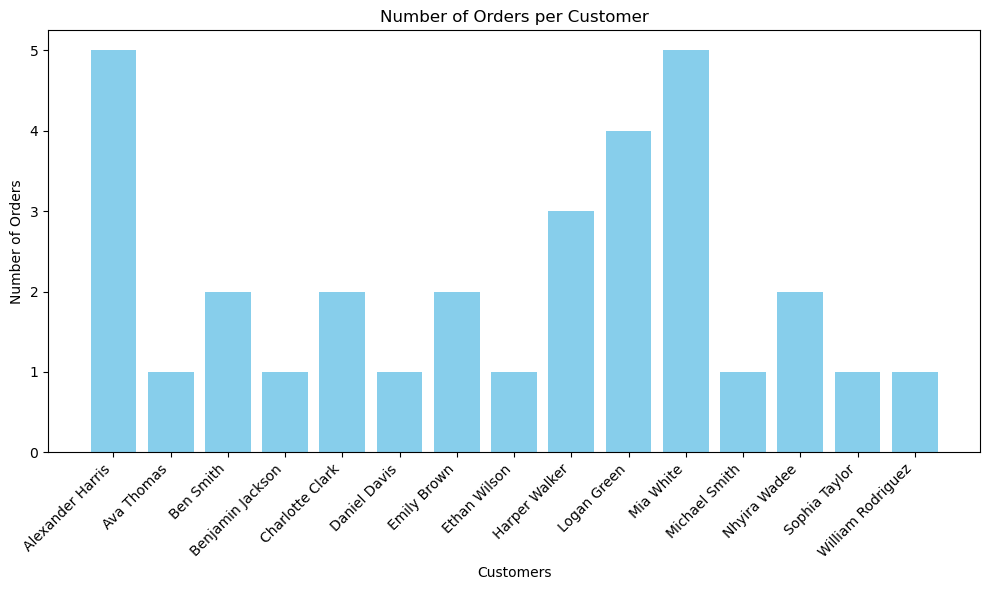

In [67]:
#Visualization

# Extracting customer names and order counts from the results
customer_names = [result[0] for result in results]
order_counts = [result[1] for result in results]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(customer_names, order_counts, color='skyblue')
plt.xlabel('Customers')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Customer')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
session.close()